$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
$

# Neural Networks

# I. Overview

The objective of this assignment is to train a Neural Network model on the Census Income Dataset and perform classification using that. This assignment is also concerned with comparison of the classification results from Non-Linear Logistic Regression using Neural Networks and Regular Logistic Regression.

## Approach
Using the census income dataset, we can generate a classification model that predicts whether a person can earn more than 50K or less than 50K, given some features. To perform this analysis, first of all LogisticRegression and NeuralNetLogisticRegression model classes are defined. Then using the 5-Fold approach, best parameters are found for these classes and the models were trained and executed using those parameters.

In [198]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import copy
import matplotlib.pyplot as plt

from sklearn import metrics
from IPython.display import display, Markdown, HTML

# Configurations
matplotlib.rcParams['agg.path.chunksize'] = 10000
%matplotlib inline

# Set display parameters
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

# II. Data

The dataset selected for performing this assignment is "Census Income Data" from the following source.
Source: https://archive.ics.uci.edu/ml/datasets/Census+Income
It is extracted from Census Income dataset by Barry Becker (from Data Mining and Visualization Lab, Silicon Graphics). The dataset can be used to predict whether a particular person can earn more than $50k per year or not.

### Attributes
The attributes of the dataset are:
* age: continuous numbers. 
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* fnlwgt: Final sampling weight, generated by census bureau. 
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* education-num: continuous. 
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* sex: Female, Male. 
* capital-gain: gain from assets; continuous. 
* capital-loss: loss from other assets; continuous. 
* hours-per-week: continuous. 
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Purpose
This dataset can be used for classification, to determine whether salary is greater than 50K or less than 50K

In [199]:
def shape_text(shape) :
    return str(shape[0]) + ' rows and ' + str(shape[1]) + ' columns'

# Read the data
names = ['age', 
         'workclass', 
         'fnlwgt', 
         'education', 
         'education-num', 
         'marital-status', 
         'occupation', 
         'relationship', 
         'race', 
         'sex', 
         'capital-gain', 
         'capital-loss', 
         'hours-per-week', 
         'native-country', 
         'salary']
types = {
    'age': 'int64',
    'workclass': 'category',
    'fnlwgt': 'int64', 
    'education': 'category', 
    'education-num': 'int64', 
    'marital-status': 'category', 
    'occupation': 'category', 
    'relationship': 'category', 
    'race': 'category', 
    'sex': 'category', 
    'capital-gain': 'int64', 
    'capital-loss': 'int64', 
    'hours-per-week': 'int64', 
    'native-country': 'category', 
    'salary': 'category'
}

strip = lambda x: x.strip()
converters = {
    'workclass': strip,
    'education': strip,
    'marital-status': strip,
    'occupation': strip,
    'relationship': strip,
    'race': strip,
    'native-country': strip,
    'salary': strip
};

# Read the files
train_set = pd.read_csv('adult.data', header=None, names=names, sep=', ', na_values=['?'])
test_set = pd.read_csv('adult.test', header=None, names=names, sep=', ', na_values=['?'])

output = 'Shape of the training set is: \n' + shape_text(train_set.shape)
display(Markdown(output))
output = 'Shape of the test set is: \n' + shape_text(test_set.shape)
display(Markdown(output))

/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Shape of the training set is: 
32561 rows and 15 columns

Shape of the test set is: 
16281 rows and 15 columns

In [200]:
train_set

,age,workclass,fnlwgt,education,education-num,...,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,...,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,...,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,...,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,...,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,...,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,...,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,...,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,321865,Masters,14,...,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,...,0,0,40,United-States,<=50K


## Test for Missing Values
There are missing value in the data indicated by '?'

In [201]:
def fraction_missing(dataset):
    """ Identify the fraction of missing values in each column
    """
    cols = dataset.columns
    fractions = {}
    total = dataset.index.shape[0]
    
    for col in cols:
        fractions[col] = dataset[dataset[col].isnull()].shape[0] / total            
    return pd.DataFrame(list(fractions.items()), columns=['columns', 'fraction_of_null'])
    
display(Markdown('### Missing in Training Set'))
display(HTML(fraction_missing(train_set).to_html()))

display(Markdown('### Missing in Test Set'))
fraction_missing(test_set)

### Missing in Training Set

,columns,fraction_of_null
0,age,0.000
1,workclass,0.056
2,fnlwgt,0.000
3,education,0.000
4,education-num,0.000
5,marital-status,0.000
6,occupation,0.057
7,relationship,0.000
8,race,0.000
9,sex,0.000


### Missing in Test Set

,columns,fraction_of_null
0,age,0.000
1,workclass,0.059
2,fnlwgt,0.000
3,education,0.000
4,education-num,0.000
5,marital-status,0.000
6,occupation,0.059
7,relationship,0.000
8,race,0.000
9,sex,0.000


In [202]:
# For each column with the missing values, we will impute with mode
train_set['workclass'].fillna(train_set['workclass'].value_counts().index[0], inplace=True)
train_set['occupation'].fillna(train_set['occupation'].value_counts().index[0], inplace=True)
train_set['native-country'].fillna(train_set['native-country'].value_counts().index[0], inplace=True)

test_set['workclass'].fillna(test_set['workclass'].value_counts().index[0], inplace=True)
test_set['occupation'].fillna(test_set['occupation'].value_counts().index[0], inplace=True)
test_set['native-country'].fillna(test_set['native-country'].value_counts().index[0], inplace=True)

## Converting Categories to Codes
For classification, we would need to convert categories to their corresponding codes

In [203]:
# Change object to category types
train_set = train_set.astype(types)
test_set = test_set.astype(types)

# Read category labels and convert category to numerical types
clabels = {}
for col in train_set.columns:
    if train_set[col].dtype.name == 'category':
        clabels[col] = list(train_set[col].cat.categories)
        train_set[col] = train_set[col].cat.codes
        test_set[col] = test_set[col].cat.codes

The dataset looks good. So we can move ahead with the preliminary analysis.

## Preliminary Analysis
Following plots give us an overview of the data distribution. Based on this, we can select features which will give best separation.

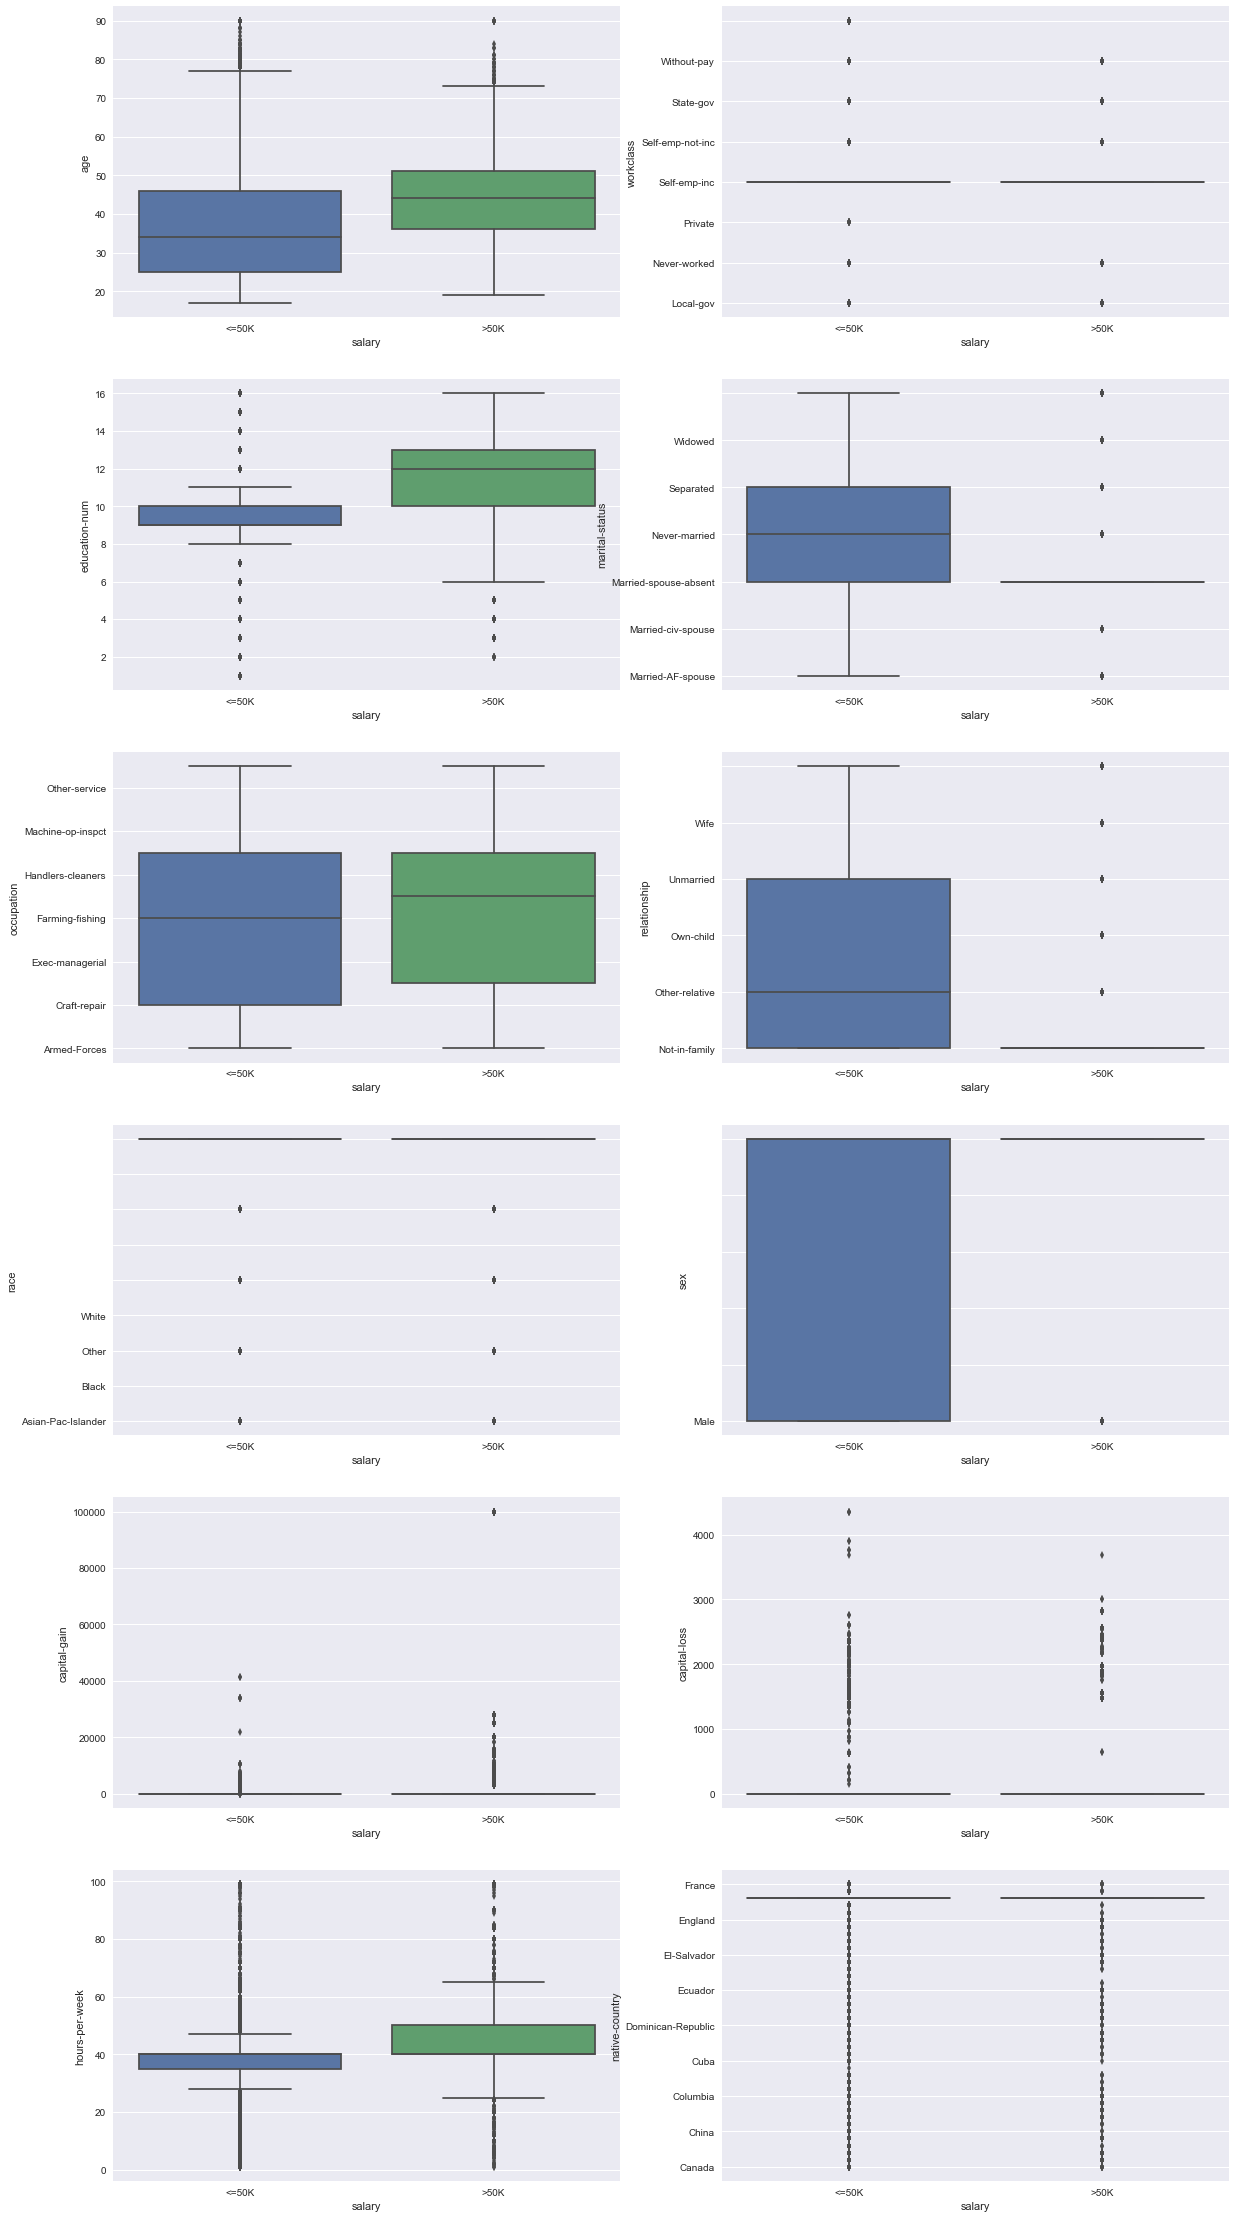

In [204]:
# Select columns for the analysis
selected_cols = ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

# Generate box plots with respect to "apply" without outliers
fig = plt.figure(figsize=(20, 40))
for i, col in enumerate(selected_cols):
    fig.add_subplot(int(math.ceil(len(selected_cols) / 2)), 2, i + 1)
    ax = sns.boxplot(x='salary', y=col, data=train_set)
    ax.set_xticklabels(labels=clabels['salary'])
    if col in clabels:
        ax.set_yticklabels(labels=clabels[col])
        
plt.show()

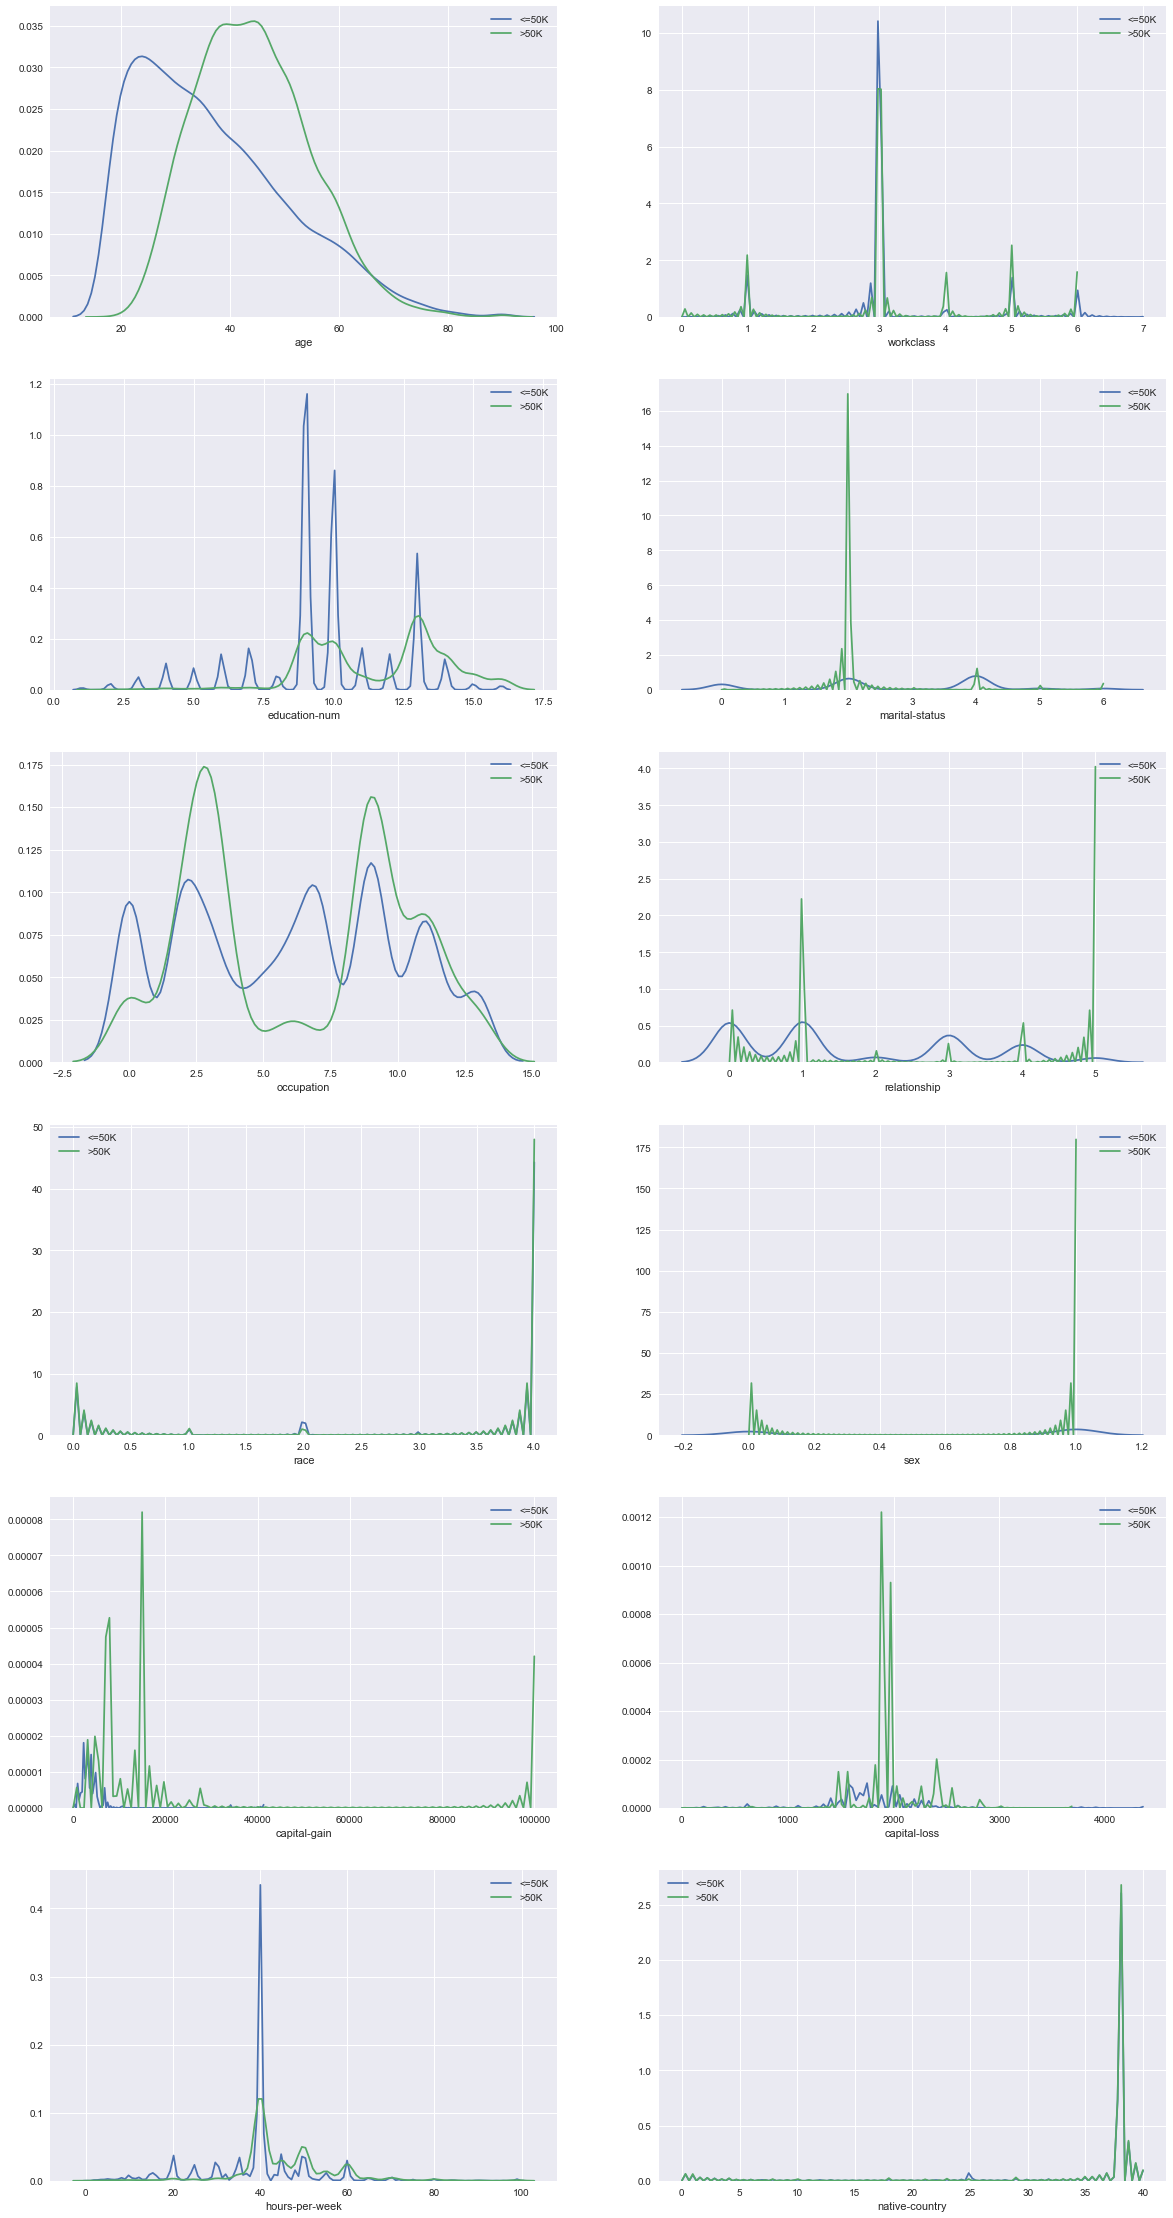

In [205]:
# Generate distribution plots
fig = plt.figure(figsize=(20, 40))
sns.set(color_codes=True)
for i, col in enumerate(selected_cols):
    fig.add_subplot(int(math.ceil(len(selected_cols) / 2)), 2, i + 1)
    sns.distplot(train_set[train_set['salary'] == 0][col], label=clabels['salary'][0], kde=True, hist=False)
    sns.distplot(train_set[train_set['salary'] == 1][col], label=clabels['salary'][1], kde=True, hist=False)
        
plt.show()

## Correlation Matrix

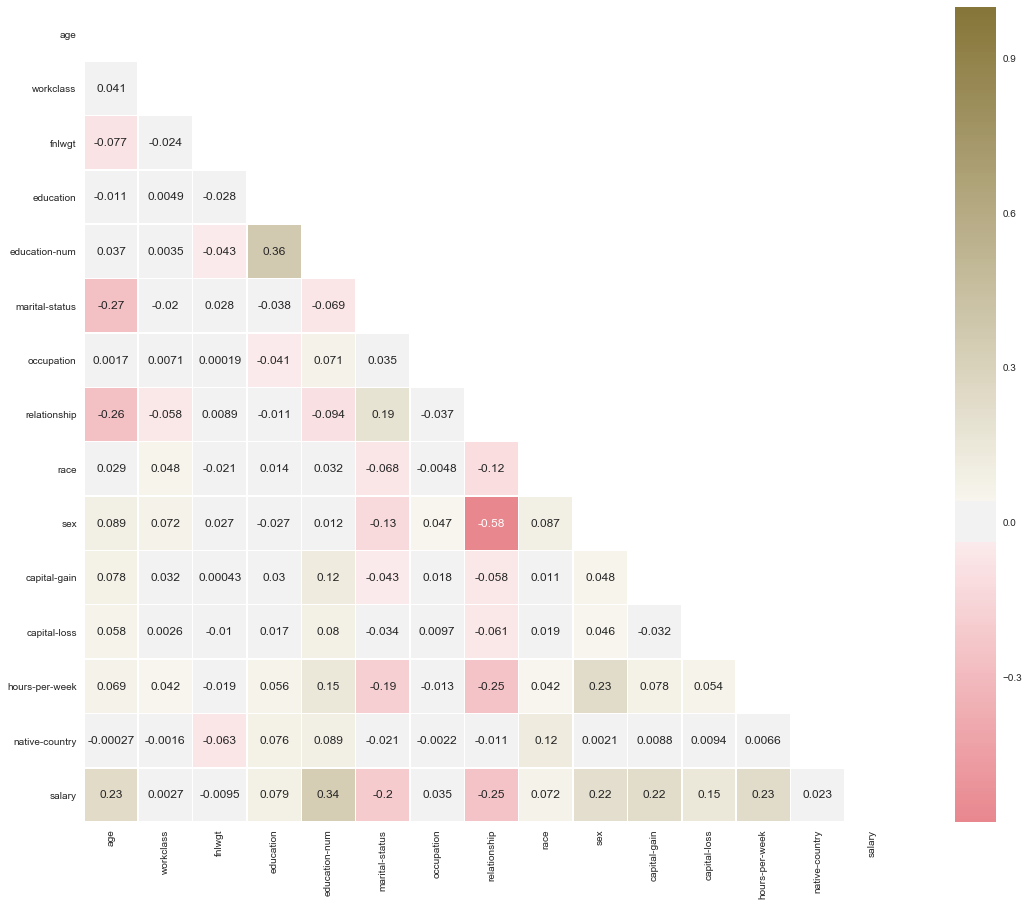

In [206]:
corr = train_set.corr()

# Prepare mask and color palette
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 70, as_cmap=True)

# Plot heatmap of correation matrix
fig = plt.figure(figsize=(20, 15))
sns.set(style="white")
sns.heatmap(corr, mask=mask, square=True, cmap=cmap, center=0, annot=True, linewidths=.5)
plt.show()

## Feature Selection
By observing the distribution, box-plots and correlation matrix, we can see that features "fnlgwt", "workclass", "race", "capital-gain", "native-country" and "sex", have very less variation, hence less imported. Therefore, I have selected counter features to maximize variation and improve classification:
'age', 'education-num', 'marital-status', 'occupation', 'relationship', 'hours-per-week'

In [207]:
selected_cols = ['age', 'education-num', 'marital-status', 'occupation', 'relationship', 'hours-per-week']

### Scatter Plot
From the below plots, we can see that there is no linear decision boundary.

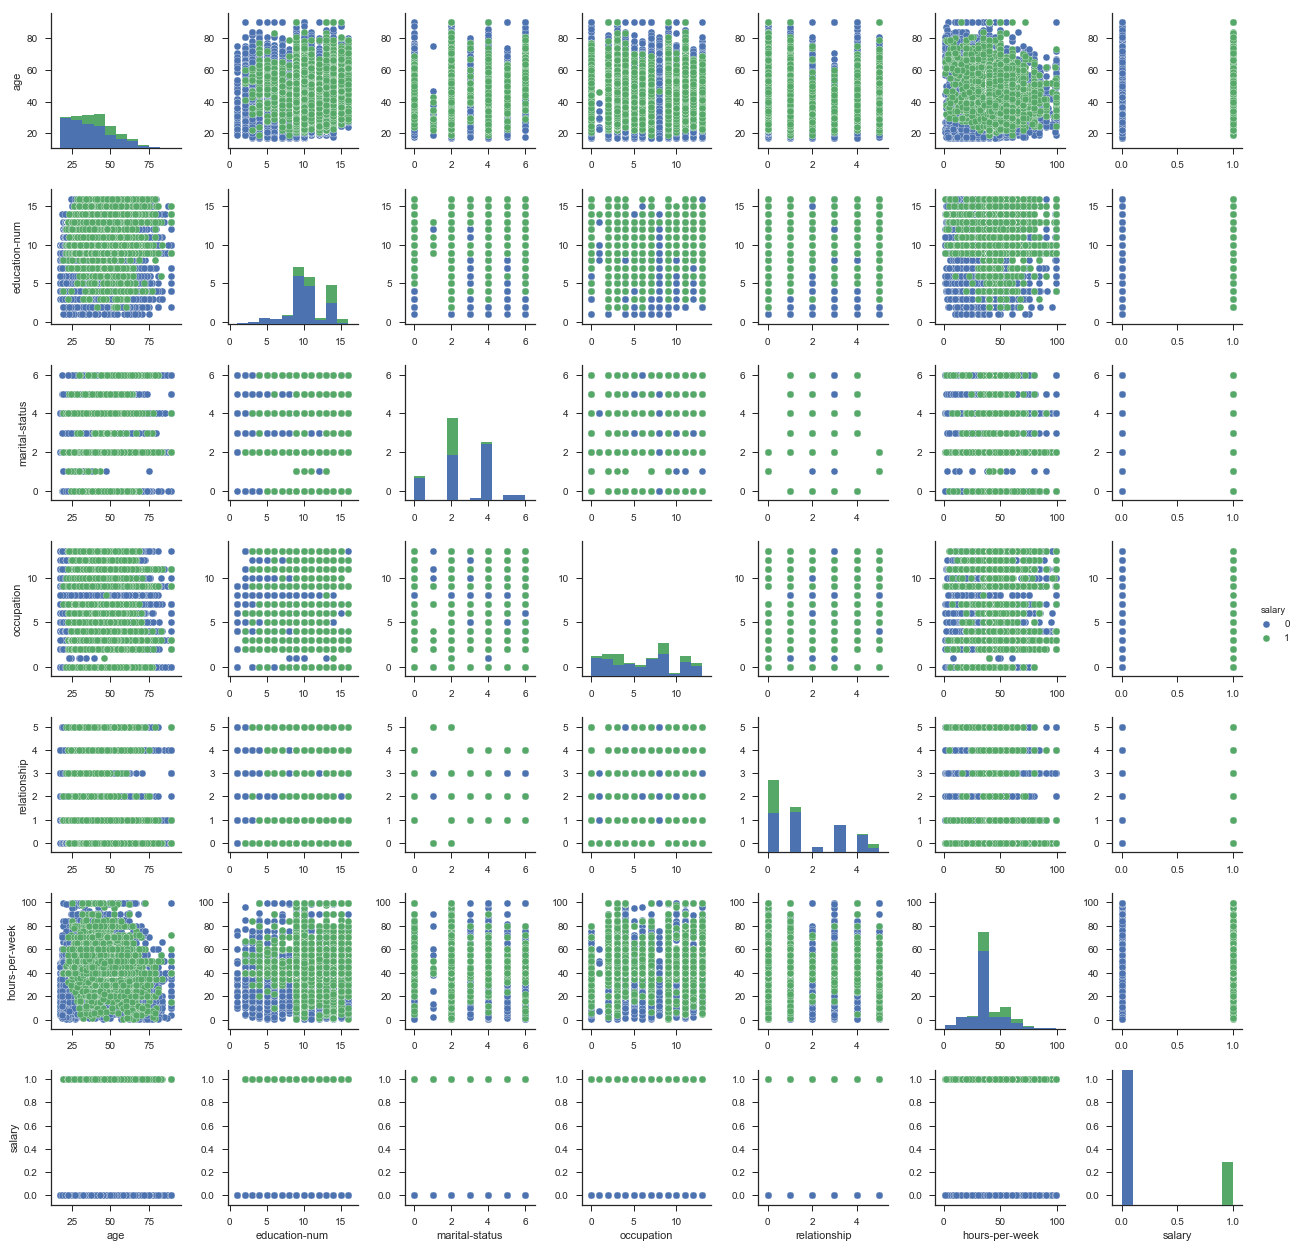

In [208]:
sns.set(style="ticks")
sns.pairplot(train_set[selected_cols + ['salary']], hue="salary")
plt.show()

## Balancing Classes
The negative to positive ratio in the dataset is 3:1. Performing under-sampling to balance the classes.

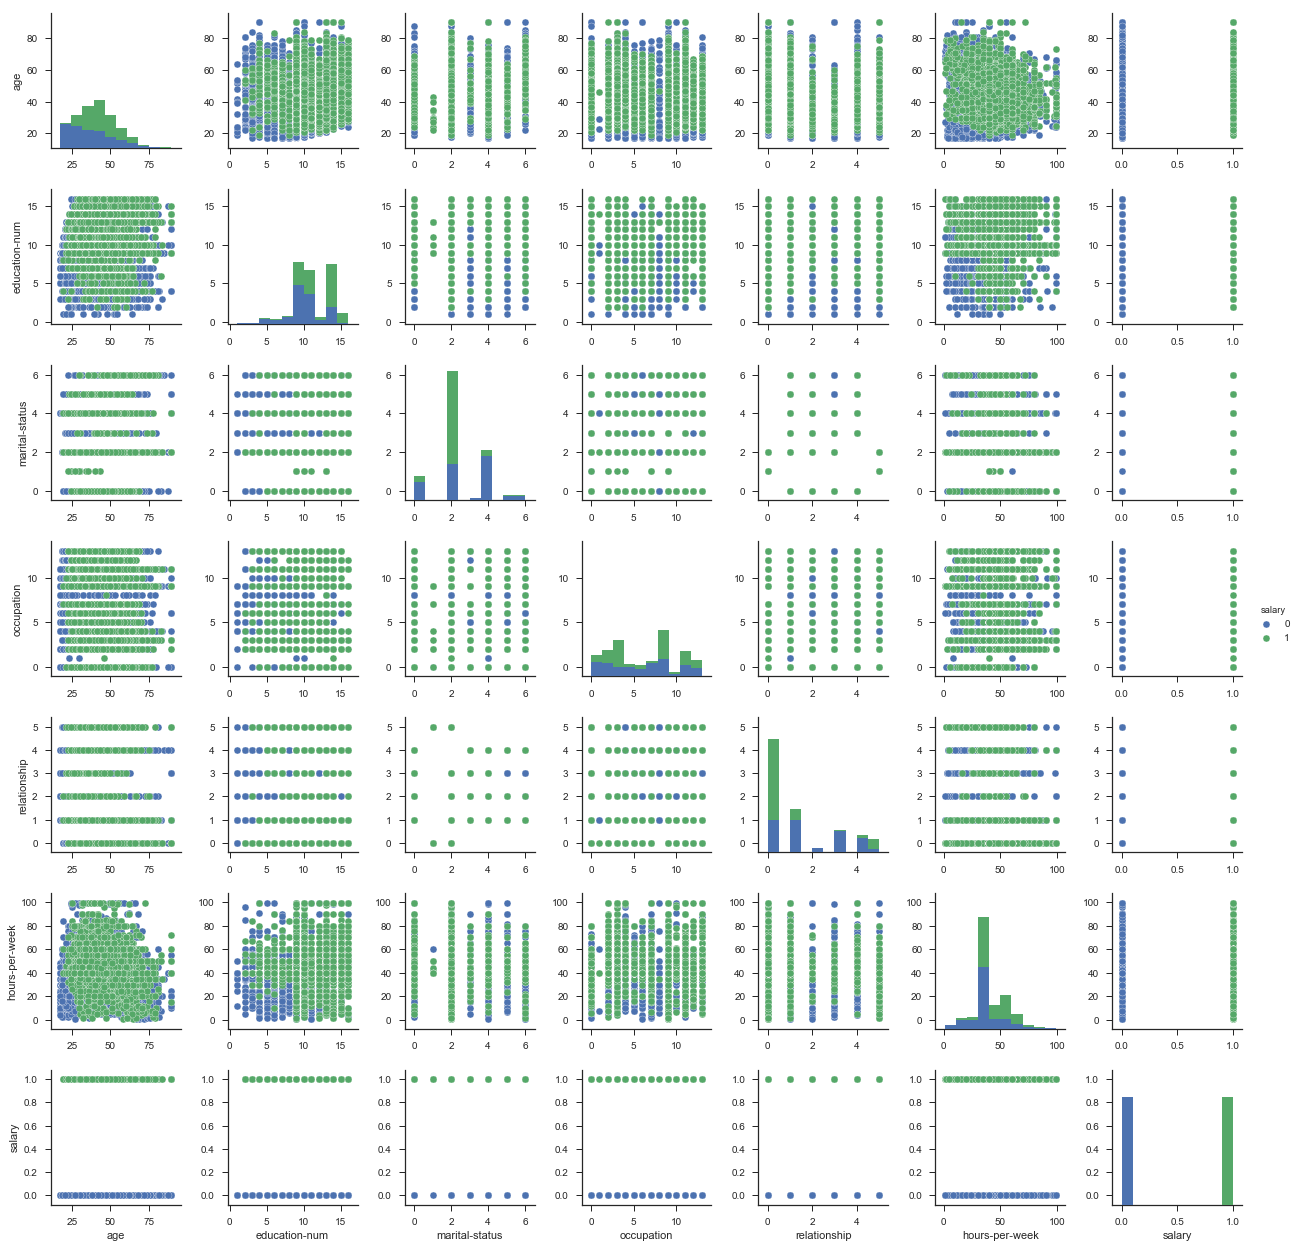

In [209]:
ptrain_set = train_set[train_set['salary'] == 0]
ntrain_set = train_set[train_set['salary'] == 1]
ptrain_set = ptrain_set.sample(n=ntrain_set.shape[0])
btrain_set = ptrain_set.append(ntrain_set).sample(frac=1).reset_index(drop=True)

# Plot scatter again
sns.set(style="ticks")
sns.pairplot(btrain_set[selected_cols + ['salary']], hue="salary")
plt.show()

## Train-Test Generation

In [210]:
train_x = btrain_set[selected_cols].values
train_t = btrain_set['salary'].values.reshape(-1, 1)

test_x = test_set[selected_cols].values
test_t = test_set['salary'].values.reshape(-1, 1)

# III. Methods

- Summarize the nonlinear classification model. 
- Inherit the NeuralNet class for regression, implement your own version of Nonlinear Logistic Regression classifier. 
- Explain your codes. 
- Use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy. 

## Neural Networks
Neural networks, or artificial neural networks, are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions, we build or stack multiple neuron-like hidden units to map data into nonlinear space for rich representation.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png" width=500/>
<center>Figure 1. Anatomy of a neuron (wikipedia) </center>

A general example of a Neural Network is as follows. The following example represents a network with Perceptron model as its activation function

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/perceptron.png" width=600 />

In perceptron, passing the output of linear model to the step function, we get discrete outputs. By connecting the perceptrons together , we can actually build synaptic connections. We call this model as *multi-layer perceptron* (MLP). 

## Non-linear Classification using Neural Networks

A non-linear activation function makes a Neural Network non-linear. For example, we can use the Sigmoid function as an activation function.

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
\wv_j \leftarrow \wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(\xv_n)\Big) \xv_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Remember we start from the error function below for the derivation bvefore:

$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/linearlogreg.png" width=450 />

We can also extend this to two layer neural networks. Similar to the derivation of neural network for regression, we can derive the gradient by switching the squuared error with the negative log likelihood function above. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/nonlinearlogreg.png" width=600 />



From the error function $E(\wv)$, we can derive the gradient to update the weights for each layer. 



## Implementation

### NeuralNet Logistic Regression
We have been given a NeuralNet implementation for this assignment. To implement the Logistic Regression over that Neural Network class, the forward pass method is modified to implement the Sigmoid function. 

The purpose of methods are:
- forward: performs feed forward
- train: Trains the model
- use: Applies the trained modal on test data and returns probabilities of each class

In [211]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        super().__init__(nunits)

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                #t = 1 / (1 + np.exp(-np.dot(self.add_ones(t), self._W[i])))
                z = np.dot(self.add_ones(t), self._W[i])
                f = np.exp(z)
                t = f / (np.sum(f, axis=1, keepdims=True))
        return (t, Z)

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        # Generate indicator matrix
        c = np.unique(T).tolist()
        T = (T == c).astype(int)
        return super().train(X, T, **params)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Y = super().use(X)
        classes = np.argmax(Y, axis=1)
        return (Y, classes)


### Logistic Regression
Following class is an implementation of normal Logistic Regression. As we are performing a binary class classification, so only the sigmoid function is used instead of the softmax. The purpose oeach method is as follows:
- __init__ : Initialized the model
- normalize: Normalize the inputs using Z-Score normalization
- add_ones: Add the bias to the input
- g: Executes the sigmoid function
- train: Trains the model
- use: Applies the trained modal on test data and returns probabilities of each class

In [212]:
class LogisticRegression:
    """
        Logistic Regression Classification
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, param):
        # Learning rate
        self.alpha = param[0]
        # Number of iterations
        self.niter = param[1]
        
        self.meanX = None
        self.stdX = None
        
    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)
        # Determine Mean and Standard deviation
        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        
        # Perform Z-Score transformation
        Xs = (X - self.meanX) / self.stdX
        return Xs
        
    def _check_matrix(self, mat, name):
        """
        Check the shape of the input matrix
        """
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
            
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    def g(self, X, w):
        """
            Sigmoid function
        """
        return 1 / (1 + np.exp(-(X @ w)))
    
    def train(self, X, T):
        """
            Train Logistic Regression model
        """
        # Identify unique classes
        c = np.unique(T).tolist()
        # Generate indicator matrix
        T = (T == c).astype(int)
        
        # Generate Normalize
        X = self.normalize(X)
        X = self.add_ones(X)
        
        # Initialize random weights
        self.w = np.random.rand(np.shape(X)[1], len(c))
        
        # Learn weights
        for step in range(self.niter):
            y = self.g(X, self.w)
            # Gradient descent
            self.w += self.alpha * X.T @ (T - y)
            
    def use(self, X):
        # Normalize input
        X = (X - self.meanX) / self.stdX
        X = self.add_ones(X)
        # Apply sigmoid
        Y = self.g(X, self.w)
        classes = np.argmax(Y, axis=1)
        return (Y, classes)

The following function performs the visualization of the classification results.

In [213]:
def visualize_classes(T, Y):
    # Visualize classes
    Y = np.argmax(Y, axis=1).reshape(-1, 1)
    # Plot the output
    plt.figure(figsize=(20, 10))
    plt.step(range(T.shape[0])[0::100], Y[0::100], label='Predicted')
    plt.step(range(T.shape[0])[0::100], T[0::100], label='Actual')
    plt.title('Actual vs Predicted classes (interval of 100)')
    plt.legend()
    plt.show()

In [214]:
def visualize(T, Y) :
    """ Generates analysis of the model. It includes
        * Probability Distribution
        * ROC Curve
        * Confusion Matrix
        * Accuracy / Precision / Recall / F-Score / AUC
    """
    # Probabilities of positive class
    P = Y[:, 1].reshape(-1, 1)

    # ROC Curve
    fpr, tpr, thresh = metrics.roc_curve(T, P, pos_label=1)

    # Generate classes
    Y = np.argmax(Y, axis=1).reshape(-1, 1)

    # Generate Confusion Matrix
    cm = metrics.confusion_matrix(T, Y)
    cm = np.flip(np.flip(cm, axis=0), axis=1)
    cm = pd.DataFrame(cm, index=['positive (>50k)', 'negative (<=50k)'], columns=['positive (>50k)', 'negative (<=50k)'])

    # Prepare statistics Dataframe
    stats = dict()
    stats['accuracy'] = metrics.accuracy_score(T, Y)
    stats['precision'], stats['recall'], stats['f-score'], stats['support'] = \
        metrics.precision_recall_fscore_support(T, Y)
    stats['auc'] = np.trapz(tpr, fpr)
    stats = pd.DataFrame(stats, index=['negative', 'positive']).round(2)

    # Generate Plots
    fig = plt.figure(figsize=(20, 5))

    # Plot Confusion matrix heatmap
    sns.set(style="white")
    fig.add_subplot(1, 3, 1)
    cmap = sns.diverging_palette(255, 255, as_cmap=True)
    sns.heatmap(cm, fmt="d", cmap=cmap, annot=True, square=True, cbar=False, linewidths=.5)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual');
    plt.xlabel('Predicted');

    # Plot probability distribution
    sns.set(color_codes=True)
    fig.add_subplot(1, 3, 2)
    pos_prob = P[T == 1]
    neg_prob = P[T == 0]
    sns.distplot(pos_prob, label='Positive Class (>50K)', hist=False)
    sns.distplot(neg_prob, label='Negative Class (<=50K)', hist=False)
    plt.title('Probability Distribution')

    # ROC Curve
    fig.add_subplot(1, 3, 3)
    plt.plot([0,1],[0,1],'r--')
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.show()

    display(HTML(stats.to_html()))

### K-Fold Cross-Validation
For Non-Linear Regression, we play with several parameters to determine the best. For that we can leverage K-Fold Cross Validation. The idea is preparing one dataset (a validation set) by pretending that we cannot see the labels. After choosing a model parameter (or a model) and train it with training dataset, we test it on the validation data. Comparing the validation error, we select the one that has the lowest validation error. Finally, we evaluate the model on testing data.

The algorithm is as follows:
- Choose K for K-fold cross validation.
- Initialize the lists res = [], testErrs = [].
- Split data X and label T into K number of partitions.

- For each TEST partition
    - For each validation partition among the rest partitions
    - Choose the rest partitions into a training set.
    - For each set P of parameters to test
        - Using P, train the model
        - Use the trained model on the validation data
        - Evaluate the validation result and store the restuls to res
    - From the res result, pick the one with the best result.
    - Retrain the model with the best parameter p in P.
    - Apply the model with the best parameter p* to the test dataset.
    - Evaluate the result err and store the tuple (p*, err) to testErrs.

Return testErrs.

The algorithm is implemented by the following class. 

In [215]:
class KFold:
    def __init__(self, k, modelClass):
        self.k = k
        self.modelClass = modelClass
        
    def error(self, T, Y):
        """
            Mean absolute error for the classification
        """
        n = T.shape[0]
        return np.sum(T * Y) / n
        
    def execute(self, X, T, params):
        size = len(X)
        # Partition size of the fold
        partition_size = int(math.floor(size / self.k))
        # End index of the partition
        partition_indices = np.arange(partition_size, size, partition_size)
        
        all_errors = []
        test_errors = []
        
        # Loop on the test partitions
        for fold, i in enumerate(partition_indices):
            res = {}
            
            # Loop on the validation partitions
            for j in partition_indices:
                # Skip ith partitition because that's test partition
                if i == j:
                    continue
                    
                # Mask test and validation partition
                mask = np.ones(size, dtype=bool)
                mask[range(i - partition_size, i)] = False;
                mask[range(j - partition_size, j)] = False;
                X_train = X[mask]
                T_train = T[mask]
                
                X_test = X[j - partition_size:j]
                T_test = T[j - partition_size:j]
                
                # Apply algorithm here
                # Loop on the model parameters
                for (k, param) in enumerate(params):
                    model = self.modelClass(param)
                    model.train(X_train, T_train)
                    Y_test, classes = model.use(X_test)
                    
                    error = self.error(T_test, Y_test)
                    res[k] = error
                    all_errors.append(error)
            
            # Get best parameter with mimimum error
            param = params[min(res, key=res.get)]
            mask[range(i - partition_size, i)] = False;
            # Identify train and test for training
            X_train = X[mask]
            T_train = T[mask]
            X_test = X[i - partition_size:i]
            T_test = T[i - partition_size:i]
            
            # Train the model
            model = self.modelClass(param)
            model.train(X_train, T_train)
            Y_test, classes = model.use(X_test)
            
            # Calculate error
            error = self.error(T_test, Y_test)
            test_errors.append((param, error))
            all_errors.append(error)
            
            display(Markdown('### Fold ' + str(fold + 1)))
            # Visualize 
            visualize(T_test, Y_test)
            
        # Visualize the distribution of the errors
        sns.set(color_codes=True)
        sns.distplot(all_errors)
        plt.xlabel('mean error')
        plt.title('5-fold, Mean Error Distribution')
        plt.show()
        
        return test_errors

## Preliminary test for the correctness
Now that the models are implemented, we need to run a general test with random parameters to see whether they work good.

In [216]:
def mean_error(T, Y):
    """
        Mean absolute error for the classification
    """
    n = T.shape[0]
    return np.sum(T * Y[: 1]) / n

# Prepare sample data for the preliminary test
prem_x = np.array([[2,5], [6,2],
              [1,9], [4,5],
              [6,3], [7,4], [3, 4]])
prem_t = np.array([1, 0, 1, 1, 0, 0, 0]).reshape(-1, 1)

# Determine a baseline of errors
error_baseline = 0.5

### Non-Linear Logistic Regression
Here I am performing the preliminary test on Non-Linear Logistic Regression (with Neural Network) model

Error - 0.428571520531
Preliminary test passed


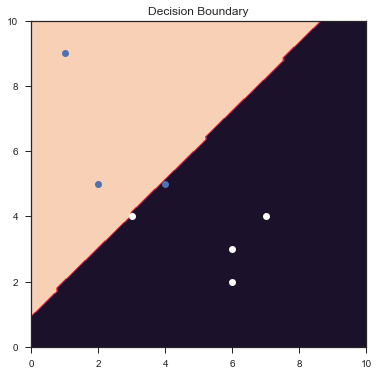

In [217]:
nunits = [prem_x.shape[1], 2]
model = NeuralNetLogReg(nunits)
model.train(prem_x, prem_t)
prem_y, _ = model.use(prem_x)

error = mean_error(prem_t, prem_y)
print('Error - ' + str(error))
if error < error_baseline:
    print('Preliminary test passed')
else:
    print('Preliminary test failed')

# Draw Decision boundary
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
xs, ys = np.meshgrid(x, y)
X = np.vstack((xs.flat, ys.flat)).T
a, classes = model.use(X)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(prem_x[prem_t[:, 0] == 0, 0], prem_x[prem_t[:, 0] == 0, 1], 'ow')
plt.plot(prem_x[prem_t[:, 0] == 1, 0], prem_x[prem_t[:, 0] == 1, 1], 'ob')
plt.show()

### Logistic Regression
Here I am performing the preliminary test on Non-Linear Logistic Regression (with Neural Network) model

Error - 0.430659080834
Preliminary test passed


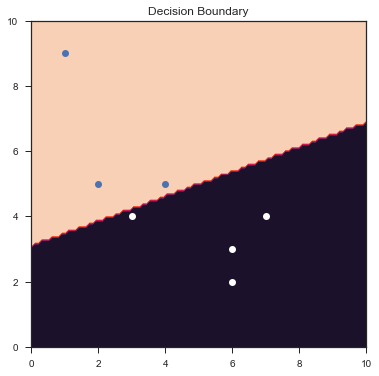

In [218]:
param = (0.1, 100)
model = LogisticRegression(param)
model.train(prem_x, prem_t)
prem_y, _ = model.use(prem_x)

error = mean_error(prem_t, prem_y)
print('Error - ' + str(error))
if error < error_baseline:
    print('Preliminary test passed')
else:
    print('Preliminary test failed')

# Draw Decision boundary
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
xs, ys = np.meshgrid(x, y)
X = np.vstack((xs.flat, ys.flat)).T
_, classes = model.use(X)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(prem_x[prem_t[:, 0] == 0, 0], prem_x[prem_t[:, 0] == 0, 1], 'ow')
plt.plot(prem_x[prem_t[:, 0] == 1, 0], prem_x[prem_t[:, 0] == 1, 1], 'ob')
plt.show()

# IV - Results

- Pick one of classifiers in Assignment #2 and compare with Nonlinear Logistic Regression.
- Presents the results of applications of the two classifiers.
- Visualize the results 
- Discuss about the choice of parameters for each model 
- What do you think about the results? 

## Neural Network Logistic Regression

### Network Structure Choice
The given class "NeuralNet" is an implementation of the feed forward network. For this network, I am selecting 2 hidden layers and playing with several set of number of units for those hidden layers to determine the best combination, using 5-Fold technique.
As the number of selected features = 6, so the first layer will contain 6 units. For the second and third layer, the combinations are:
- [5, 4]
- [5, 3]
- [4, 3]
- [3, 3]

/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


### Fold 1

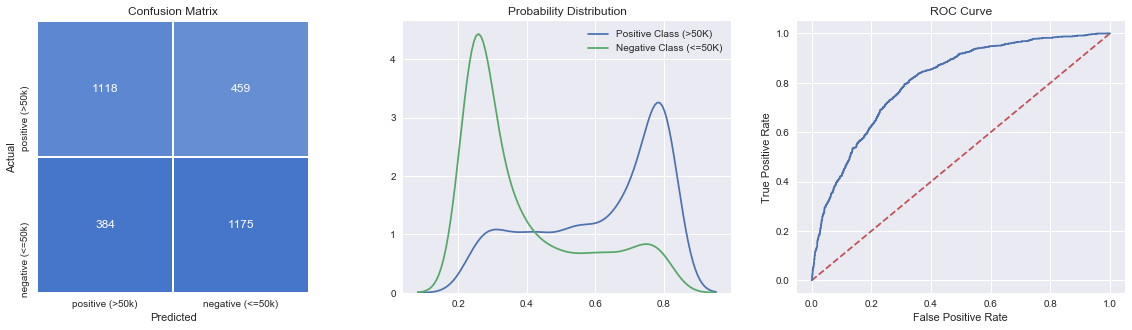

,accuracy,auc,f-score,precision,recall,support
negative,0.730,0.810,0.740,0.720,0.750,1559
positive,0.730,0.810,0.730,0.740,0.710,1577


### Fold 2

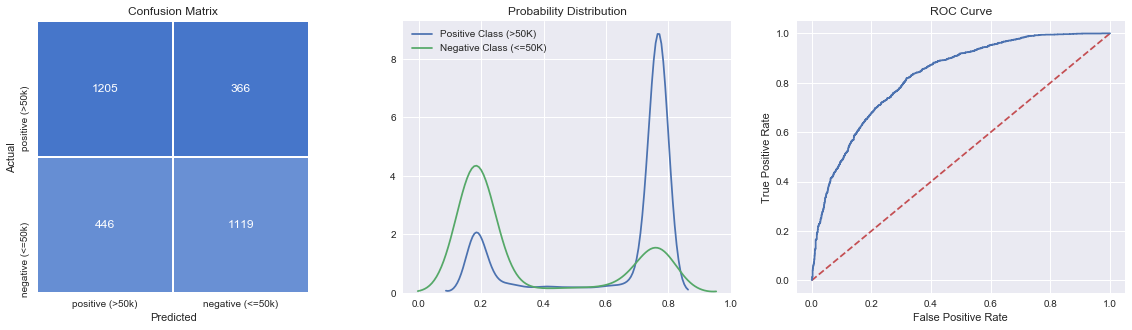

,accuracy,auc,f-score,precision,recall,support
negative,0.740,0.830,0.730,0.750,0.720,1565
positive,0.740,0.830,0.750,0.730,0.770,1571


### Fold 3

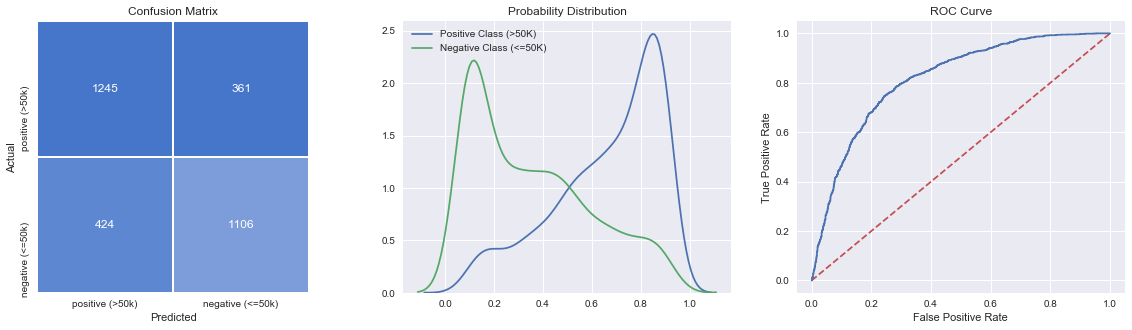

,accuracy,auc,f-score,precision,recall,support
negative,0.750,0.820,0.740,0.750,0.720,1530
positive,0.750,0.820,0.760,0.750,0.780,1606


### Fold 4

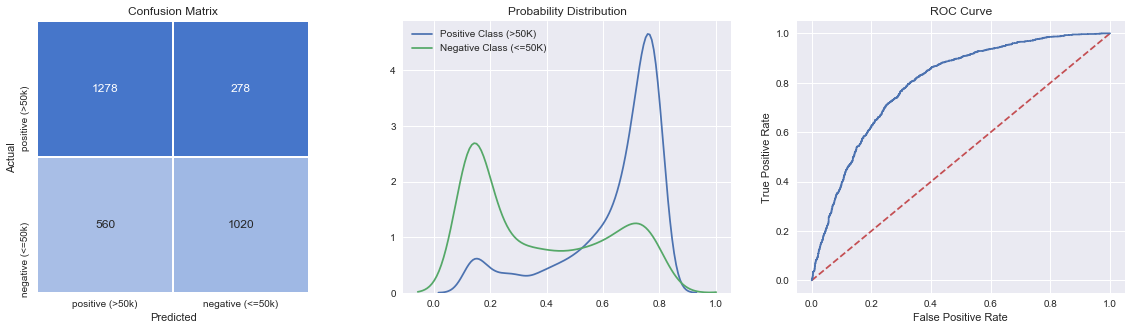

,accuracy,auc,f-score,precision,recall,support
negative,0.730,0.800,0.710,0.790,0.650,1580
positive,0.730,0.800,0.750,0.700,0.820,1556


### Fold 5

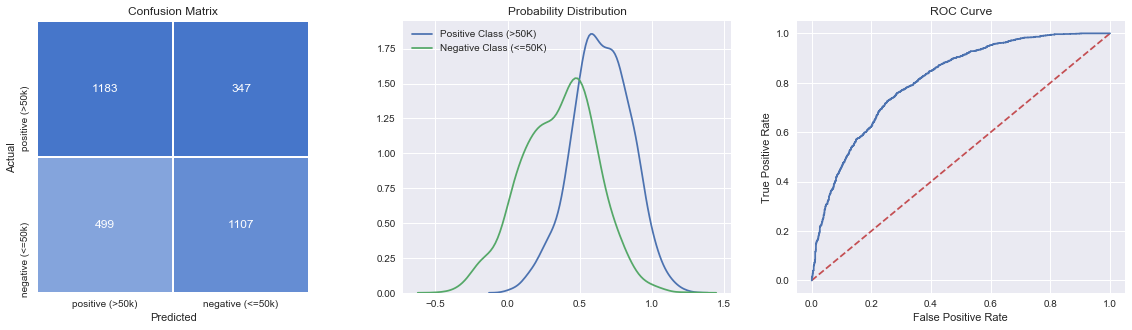

,accuracy,auc,f-score,precision,recall,support
negative,0.730,0.810,0.720,0.760,0.690,1606
positive,0.730,0.810,0.740,0.700,0.770,1530


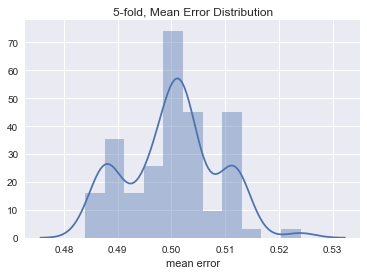

In [219]:
kfold = KFold(5, NeuralNetLogReg)
nunits = [
    [train_x.shape[1], 5, 4, 2],
    [train_x.shape[1], 3, 2],
    [train_x.shape[1], 2, 2],
    [train_x.shape[1], 2]
]
result = kfold.execute(train_x, train_t, nunits)

In [220]:
# find best parameter
errors = [entry[1] for entry in result]
min_index = np.argmin(errors)
param = result[min_index][0]
param

[6, 2]

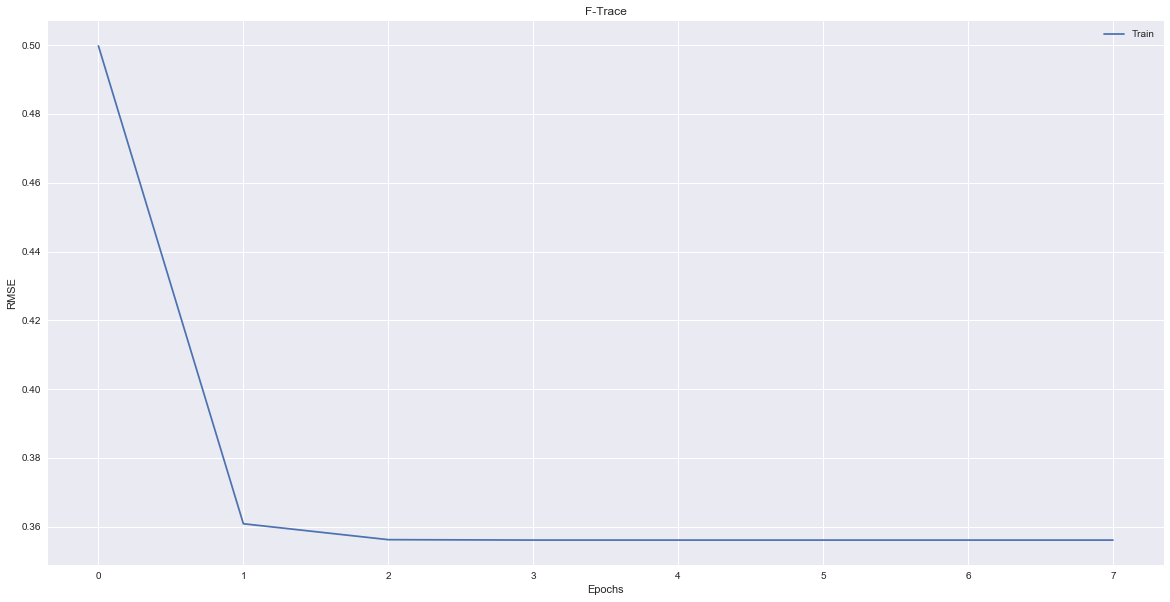

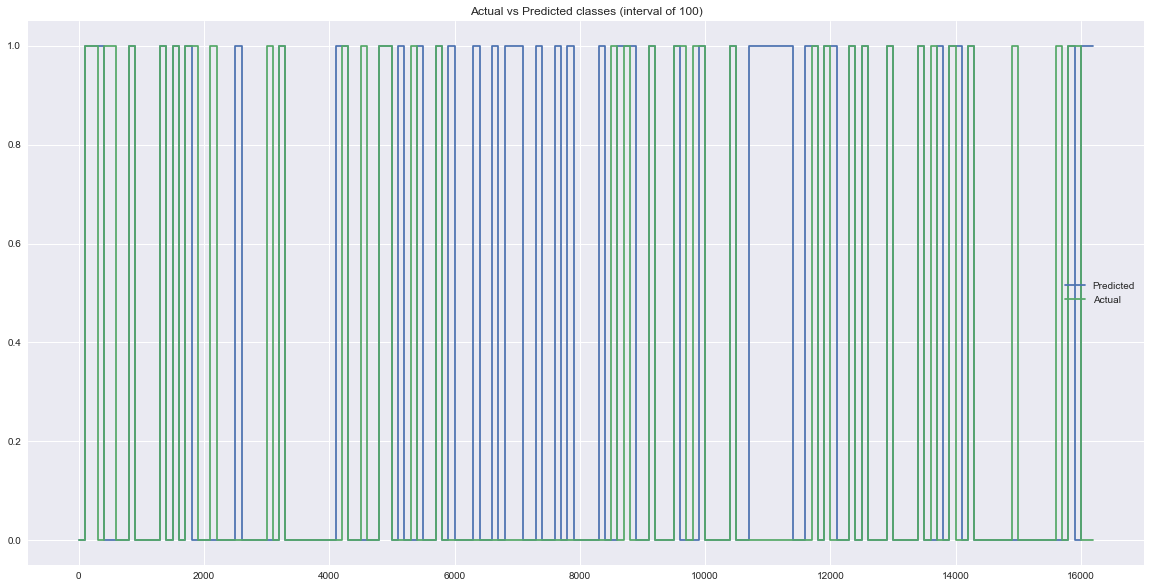

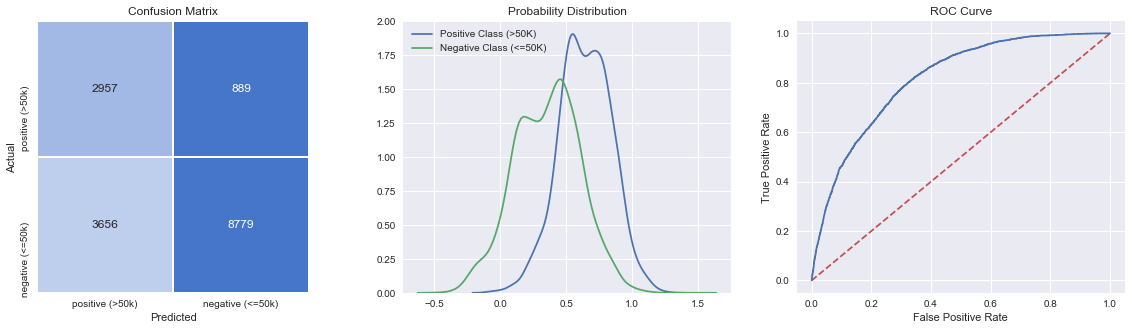

,accuracy,auc,f-score,precision,recall,support
negative,0.720,0.820,0.790,0.910,0.710,12435
positive,0.720,0.820,0.570,0.450,0.770,3846


In [221]:
# Perform logistic regression using neural network
model = NeuralNetLogReg(param)
model.train(train_x, train_t, ftracep=True)
test_y, classes = model.use(test_x)

# Visualize ftrace
plt.figure(figsize=(20, 10))
plt.plot(model.ftrace, label='Train')
plt.title('F-Trace')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Visualize classes
visualize_classes(test_t, test_y)

# Visualize Classification statistics
visualize(test_t, test_y)

## Logistic Regression

### Parameter Selection
Like the Neural Network, I am also using 5-fold with Logistic Regression to determine a good set of parameters. I am playing with a combination of learning rate and number of iterations (alpha, niter). Using the K-fold, I am trying to determine the parameters which gives least mean error, and using those to train my Logistic Regression model. The selection are -
- (0.1, 100)
- (0.2, 200)
- (0.3, 100)
- (0.4, 200)

The combinations are in the format (alpha, niter)

/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in exp


### Fold 1

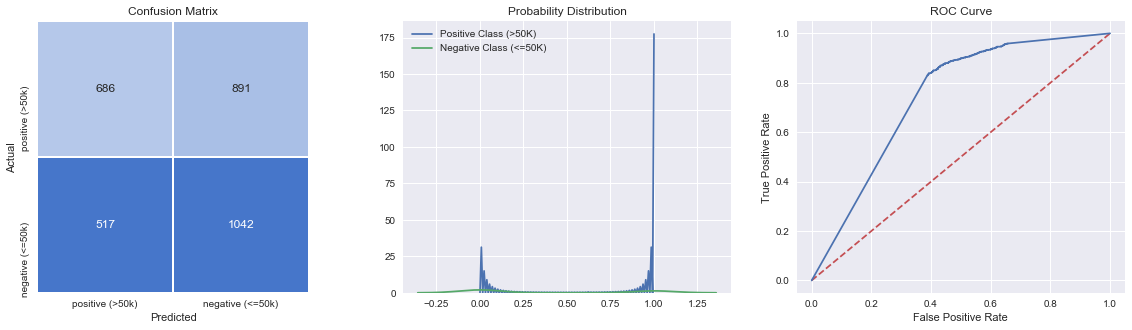

,accuracy,auc,f-score,precision,recall,support
negative,0.550,0.740,0.600,0.540,0.670,1559
positive,0.550,0.740,0.490,0.570,0.440,1577


### Fold 2

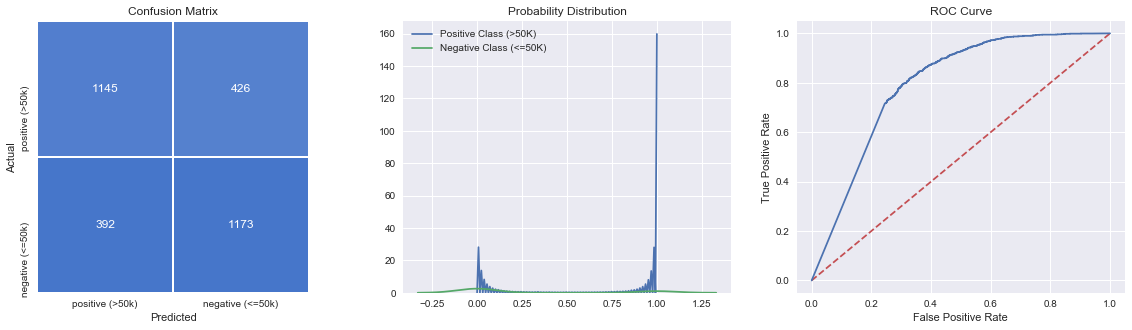

,accuracy,auc,f-score,precision,recall,support
negative,0.740,0.790,0.740,0.730,0.750,1565
positive,0.740,0.790,0.740,0.740,0.730,1571


### Fold 3

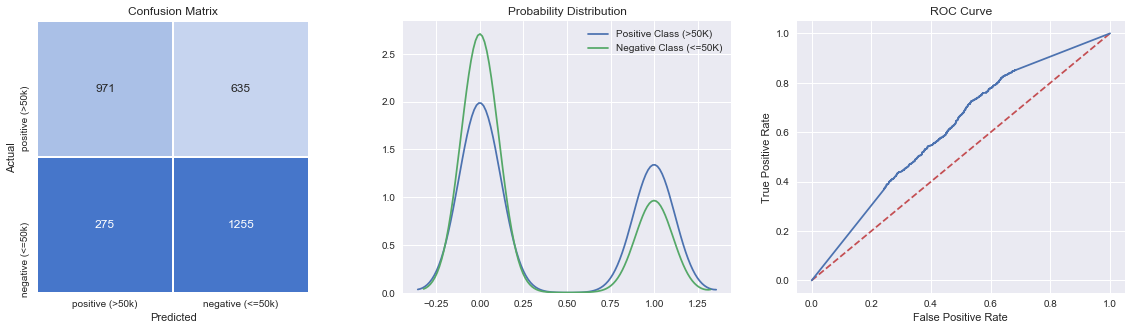

,accuracy,auc,f-score,precision,recall,support
negative,0.710,0.610,0.730,0.660,0.820,1530
positive,0.710,0.610,0.680,0.780,0.600,1606


### Fold 4

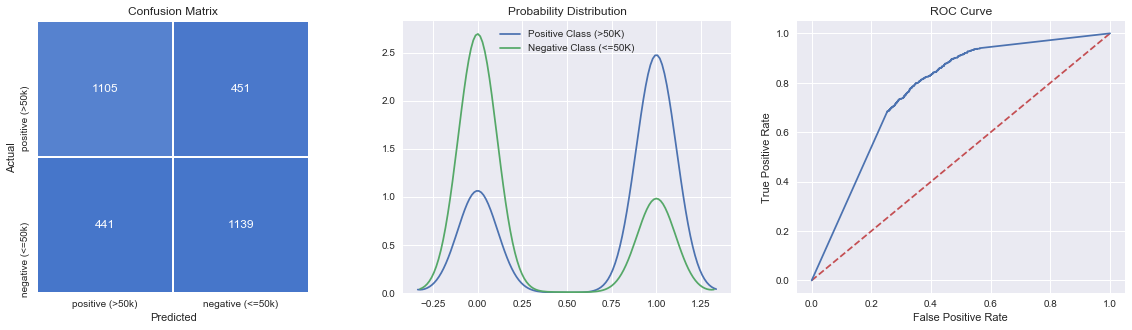

,accuracy,auc,f-score,precision,recall,support
negative,0.720,0.770,0.720,0.720,0.720,1580
positive,0.720,0.770,0.710,0.710,0.710,1556


### Fold 5

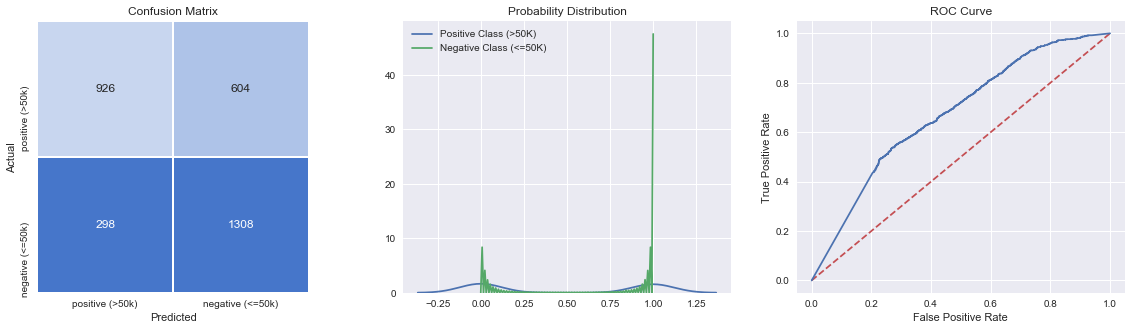

,accuracy,auc,f-score,precision,recall,support
negative,0.710,0.670,0.740,0.680,0.810,1606
positive,0.710,0.670,0.670,0.760,0.610,1530


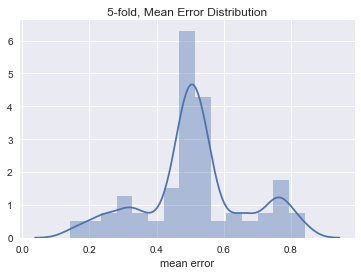

In [222]:
kfold = KFold(5, LogisticRegression)
params = [(0.1, 100), (0.2, 200), (0.3, 100), (0.4, 100)]
result = kfold.execute(train_x, train_t, params)

In [223]:
# find best parameter
errors = [entry[1] for entry in result]
min_index = np.argmin(errors)
param = result[min_index][0]
param

(0.2, 200)

/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in exp


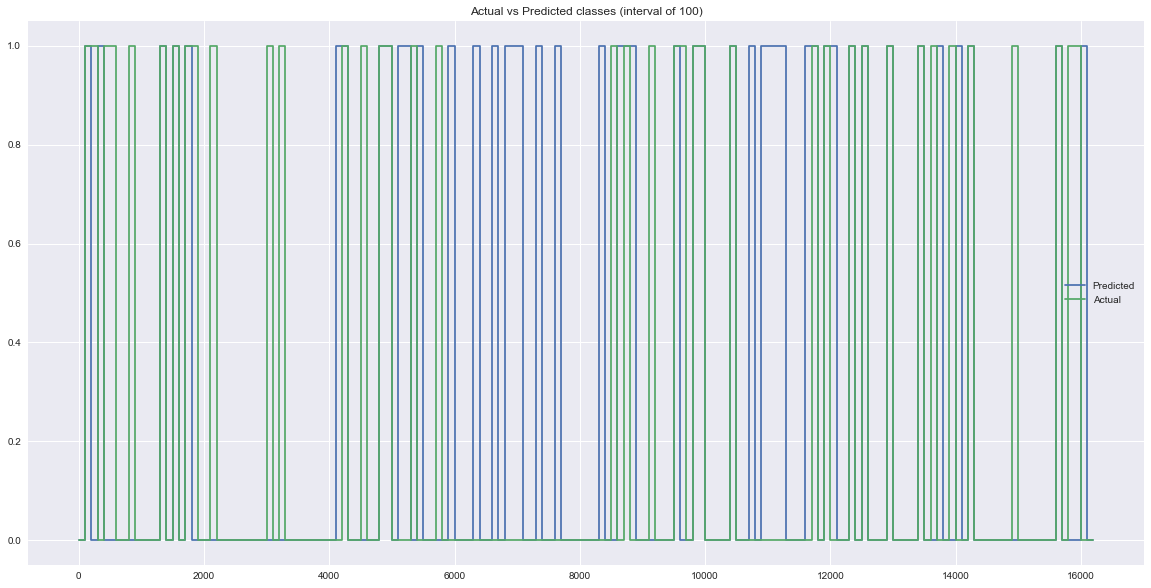

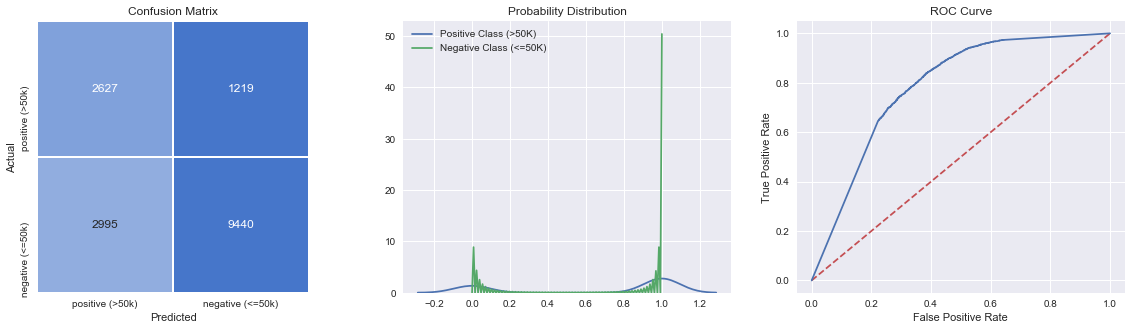

,accuracy,auc,f-score,precision,recall,support
negative,0.740,0.780,0.820,0.890,0.760,12435
positive,0.740,0.780,0.550,0.470,0.680,3846


In [224]:
# Perform logistic regression
model = LogisticRegression(param)
model.train(train_x, train_t)
test_y, _ = model.use(test_x)

# Visualize classes
visualize_classes(test_t, test_y)

# Visualize results
visualize(test_t, test_y)

## Classification Result
Before performing the classification, I have implemented two important strategies to make improve the data
- Feature Selection: selected only those features which maximizes the variation between the two classes
- Under-Sampling: As the classification modes are more prone to over-fit because of imbalance in the classes, I have balanced the classes in the training set, maintaining 1:1 ratio.

From the results we can clearly say that Non-Linear Logistic Regression model did well. We are getting an AUC 0.82 with the neural network while 0.77 with the normal Logistic Regression. If we consider the accuracy, then Logistic Regression is higher. But the more important measure would be Precision and Recall, where Non-Linear Logistic Regression is better. So overall, Non-Linear Logistic Regression is a better model for this case.

## Model Comparison
The preliminary analysis of the dataset indicated that there is no clear linear boundary. While the Logistic Regression tries to separate the classes with a linear boundary, the non-linear regression attempts to draw a better separation. This is what happened in this experiment with Neural Network based Logistic Regression.

# Conclusions

With the help of this assignment, I am able to understand the non-linear Logistic Regression and also the fact that the more sophisticated models are not always better. The major challenge that was faced during the implementation was the execution time for Neural Network

# Extra Credit

One extra credit is assigned when finish the following bullets. 

- Try nonlinear regression with neural networks and compare with linear regression model 
- Use cross validation to discover the best model and compare models. 

# TO START

- download [a4.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a4.tgz). 
- import the necessary classes or functions including NeuralNet.
- inherit NeuralNet and make NeuralNetLogReg

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the approach  
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 | 5| Summary of Neural Networks
 | 5| Summary of Nonlinear Logistic Regression
 | 5| Explanation of codes
 |10| Examination of correct implementation with preliminary test with *explanation (5 pts)*
 |20| Cross validation codes and explanation 
35 | Results | Your Data
| 20| plots for results (10 pts for each classifier)
| 5| Discussions about parameter/network structure choice 
| 5| Discussions about classificaion model comparison
| 5| Discussion about the classification results. Try to analyze what nonlinear logistic regression learned. 
5 | Conclusions 
